In [122]:
#Intro
# This dataset is from the legendary Titanic ML competition. The training data set will be used for both training and evaluation
# A submission will be made witht the test dataset, but that is currently beyond the scope of this work

#Objective
#The objective is to predict if a passenger on the Titanic survived

#Data Description
# The data contains the following columns
#survival: indicates if a passeger survived 0 = No, 1 = yes
#pclass: ticket class
#sex: sex of the passenger
#age: age in years
#sibsp: siblings/spouses abroad the Titanic
#parch : of parents/children aborad the titanic
#ticket: ticket number
#fare: passenger fare
#cabin: cabin number
#embarked: port of embarkation

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD

In [136]:
data = pd.read_csv('train.csv')


In [ ]:
# Data exploration
#1. Preview the head
#2. Check the shape
#3. Inspect missing values

In [137]:
datas.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
data.shape

(891, 12)

In [139]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
# Steps for Data cleaning
#1. Drop some columns
#2. Fill missing values for Émbarked Column
#3. Replace the missing ages with the median
median = data.Age.median()
data.Age.fillna(median, inplace = True)
data = data.drop(['PassengerId','Name','Cabin', 'Ticket'], axis=1)
data.Embarked.fillna('backfill', inplace = True)

In [141]:
# Data Engineering guide
#1. Encode with dummy variable
#2. Scale the data
#3. Do power transformation
#dummy variable encoding
data_encoded = pd.get_dummies(data, drop_first=True)

In [142]:
#Separate X and Y
Y = data_encoded['Survived']
X = data_encoded.drop(['Survived'], axis=1)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,  random_state=100)

In [144]:
X_train.shape

(668, 9)

In [146]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Embarked_backfill
225,3,22.0,0,0,9.3500,1,0,1,0
856,1,45.0,1,1,164.8667,0,0,1,0
620,3,27.0,1,0,14.4542,1,0,0,0
450,2,36.0,1,2,27.7500,1,0,1,0
423,3,28.0,1,1,14.4000,0,0,1,0


In [147]:
import numpy as np
from sklearn.preprocessing import power_transform
X_train = power_transform(X_train)
X_test = power_transform(X_test)

In [ ]:
# The following three algorithm would be used to reduce the number of features of the data
#The accuracy of the reduction will be tested using a logistic regression
# A plot of the result will be shown
# The alogrithms are 
#1. PCA
#2. FactorAnalysis
#3. Truncated SVD

In [148]:
#Using PCA

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    pipe.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return scores


ns = [1,3,5,7,8]
score_list_pca = [get_avg_score(n) for n in ns]

In [149]:
score_list_pca

[[0.672645739910314],
 [0.6681614349775785],
 [0.7668161434977578],
 [0.7847533632286996],
 [0.7847533632286996]]

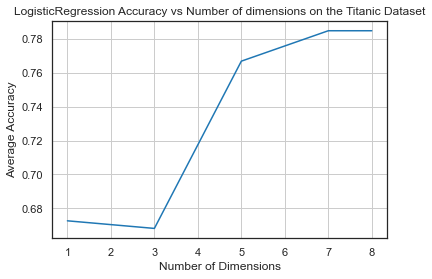

In [150]:
ax = plt.axes()
ax.plot(ns, score_list_pca)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Titanic Dataset')
ax.grid(True)

In [151]:
#Using factor analysis
def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', FactorAnalysis(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    pipe.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return scores


ns = [1,3,5,7,8]
score_list_factor = [get_avg_score(n) for n in ns]

In [152]:
score_list_factor

[[0.6143497757847534],
 [0.6322869955156951],
 [0.672645739910314],
 [0.7892376681614349],
 [0.7892376681614349]]

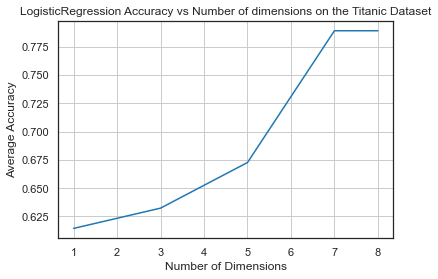

In [153]:
ax = plt.axes()
ax.plot(ns, score_list_factor)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Titanic Dataset')
ax.grid(True)

In [154]:
#Using TruncatedSVD 
#Using factor analysis
def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', TruncatedSVD(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    pipe.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return scores


ns = [1,3,5,7,8]
score_list_trunc = [get_avg_score(n) for n in ns]

In [155]:
score_list_trunc

[[0.672645739910314],
 [0.6681614349775785],
 [0.7668161434977578],
 [0.7847533632286996],
 [0.7847533632286996]]

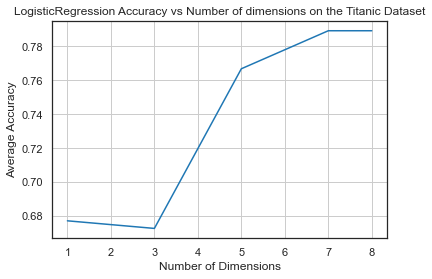

In [125]:
ax = plt.axes()
ax.plot(ns, score_list_trunc)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Titanic Dataset')
ax.grid(True)

In [159]:
maxs_pca = np.max(score_list_pca)
maxs_list_fa = np.max(score_list_factor)
maxs_trunc = np.max(score_list_trunc)

maxs_pca


0.7847533632286996

In [160]:
maxs_list_fa


0.7892376681614349

In [161]:
maxs_trunc

0.7847533632286996

In [ ]:
#Summary 
# For the data set the Factor Analysis did better than all the other algorithms

# Limitations and ways to improve
#1. One way to improve accurracy is by using K-Fold while spliting the data
